# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [38]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [39]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [40]:
df.head(10)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
5,USW00014833,2010-10-01,TMAX,194
6,USC00207308,2010-06-29,TMIN,144
7,USC00203712,2005-10-04,TMAX,289
8,USW00004848,2007-12-14,TMIN,-16
9,USC00200220,2011-04-21,TMAX,72


In [41]:
df.shape

(165085, 4)

# Q1 
Read the documentation and familiarize yourself with the dataset,
then write some python code which returns a line graph of the record high and record low temperatures 
by day of the year over the period 2005-2014. 
The area between the record high and record low temperatures for each day should be shaded

## Max Data

In [91]:
df_tmax_all = df[df['Element'] == 'TMAX'] 
df_tmax_all.head(5)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
5,USW00014833,2010-10-01,TMAX,194


In [92]:
df_tmax_2005_14 = df_tmax_all[(df_tmax_all['Date'] >= '2005-01-01') & 
                              (df_tmax_all['Date'] <= '2014-12-31')]
df_tmax_2005_14.shape

(76143, 4)

In [93]:
df_tmax_2005_14 = df_tmax_2005_14.sort_values(by = "Date")
df_tmax_2005_14.head(5)

,ID,Date,Element,Data_Value
49030,USC00207312,2005-01-01,TMAX,150
55424,USC00207308,2005-01-01,TMAX,150
18261,USC00205050,2005-01-01,TMAX,56
18049,USW00014853,2005-01-01,TMAX,56
60994,USW00004848,2005-01-01,TMAX,133


In [94]:
#df_tmax_2005_14['Date'] = pd.to_datetime(df_tmax_2005_14.index,  format='%Y-%m-%d')
df_tmax_2005_14['Year'] = pd.DatetimeIndex(df_tmax_2005_14['Date']).year
df_tmax_2005_14['Month'] = pd.DatetimeIndex(df_tmax_2005_14['Date']).month
df_tmax_2005_14['Day'] = pd.DatetimeIndex(df_tmax_2005_14['Date']).day
df_tmax_2005_14.drop(df_tmax_2005_14[(df_tmax_2005_14['Month'] == 2) & 
                                     (df_tmax_2005_14['Day'] == 29)].index, inplace = True)
df_tmax_2005_14.head(5)

,ID,Date,Element,Data_Value,Year,Month,Day
49030,USC00207312,2005-01-01,TMAX,150,2005,1,1
55424,USC00207308,2005-01-01,TMAX,150,2005,1,1
18261,USC00205050,2005-01-01,TMAX,56,2005,1,1
18049,USW00014853,2005-01-01,TMAX,56,2005,1,1
60994,USW00004848,2005-01-01,TMAX,133,2005,1,1


In [95]:
df_tmax_2005_14 = df_tmax_2005_14.groupby(['Month', 'Day'], as_index = False).max()
df_tmax_2005_14.head(5)

,Month,Day,ID,Date,Element,Data_Value,Year
0,1,1,USW00094889,2014-01-01,TMAX,156,2014
1,1,2,USW00094889,2014-01-02,TMAX,139,2014
2,1,3,USW00094889,2014-01-03,TMAX,133,2014
3,1,4,USW00094889,2014-01-04,TMAX,106,2014
4,1,5,USW00094889,2014-01-05,TMAX,128,2014


In [96]:
df_tmax_2005_14.shape

(365, 7)

## Min Data

In [97]:
df_tmin_all = df[df['Element'] == 'TMIN'] 
df_tmin_all.head(5)

,ID,Date,Element,Data_Value
1,USC00208972,2009-04-29,TMIN,56
6,USC00207308,2010-06-29,TMIN,144
8,USW00004848,2007-12-14,TMIN,-16
11,USC00205822,2008-05-29,TMIN,28
12,USC00203712,2008-10-17,TMIN,17


In [98]:
df_tmin_2005_14 = df_tmin_all[(df_tmin_all['Date'] >= '2005-01-01') & 
                              (df_tmin_all['Date'] <= '2014-12-31')]
df_tmin_2005_14.shape

(75185, 4)

In [99]:
df_tmin_2005_14 = df_tmin_2005_14.sort_values(by = "Date")
df_tmin_2005_14.head(5)

,ID,Date,Element,Data_Value
39468,USC00205563,2005-01-01,TMIN,-28
49827,USC00200228,2005-01-01,TMIN,-39
31718,USC00205451,2005-01-01,TMIN,-44
49074,USC00207312,2005-01-01,TMIN,-39
24805,USW00094889,2005-01-01,TMIN,-56


In [100]:
#df_tmax_2005_14['Date'] = pd.to_datetime(df_tmax_2005_14.index,  format='%Y-%m-%d')
df_tmin_2005_14['Year'] = pd.DatetimeIndex(df_tmin_2005_14['Date']).year
df_tmin_2005_14['Month'] = pd.DatetimeIndex(df_tmin_2005_14['Date']).month
df_tmin_2005_14['Day'] = pd.DatetimeIndex(df_tmin_2005_14['Date']).day
df_tmin_2005_14.drop(df_tmin_2005_14[(df_tmin_2005_14['Month'] == 2) & 
                                     (df_tmin_2005_14['Day'] == 29)].index, inplace = True)
df_tmin_2005_14.head(5)

,ID,Date,Element,Data_Value,Year,Month,Day
39468,USC00205563,2005-01-01,TMIN,-28,2005,1,1
49827,USC00200228,2005-01-01,TMIN,-39,2005,1,1
31718,USC00205451,2005-01-01,TMIN,-44,2005,1,1
49074,USC00207312,2005-01-01,TMIN,-39,2005,1,1
24805,USW00094889,2005-01-01,TMIN,-56,2005,1,1


In [101]:
df_tmin_2005_14 = df_tmin_2005_14.groupby(['Month', 'Day'], as_index = False).min()
df_tmin_2005_14.head(5)

,Month,Day,ID,Date,Element,Data_Value,Year
0,1,1,USC00200032,2005-01-01,TMIN,-160,2005
1,1,2,USC00200032,2005-01-02,TMIN,-267,2005
2,1,3,USC00200032,2005-01-03,TMIN,-267,2005
3,1,4,USC00200032,2005-01-04,TMIN,-261,2005
4,1,5,USC00200032,2005-01-05,TMIN,-150,2005


In [102]:
df_tmin_2005_14.shape

(365, 7)

In [103]:
dates_max = list(map(pd.to_datetime, df_tmax_2005_14['Date']))

In [104]:
dates_min = list(map(pd.to_datetime, df_tmin_2005_14['Date']))

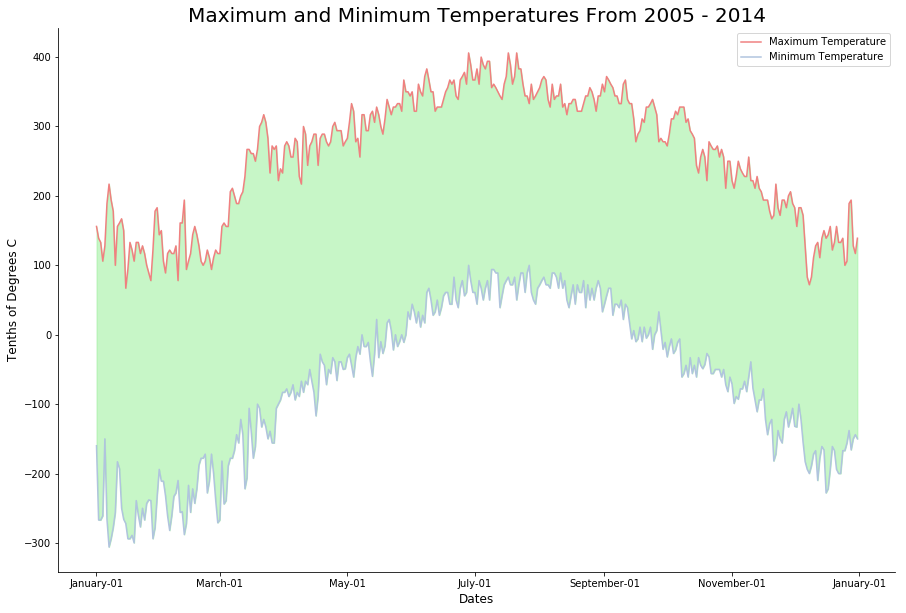

In [150]:
plt.figure()

plt.rcParams["figure.figsize"] = (15,10)

plt.plot(dates_max, 
         df_tmax_2005_14['Data_Value'],
         color = 'lightcoral',
         label = 'Maximum Temperature')

plt.plot(dates_max,
         df_tmin_2005_14['Data_Value'],
         color = 'lightsteelblue',
         label = 'Minimum Temperature')

plt.gca().fill_between(dates_max,
                       df_tmin_2005_14['Data_Value'],
                       df_tmax_2005_14['Data_Value'],
                       color = 'lightgreen',
                       alpha = 0.5)

plt.title('Maximum and Minimum Temperatures From 2005 - 2014', size = 20)
plt.xlabel('Dates', size= 12)
plt.ylabel('Tenths of Degrees C', size= 12)

for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)

import matplotlib.dates as mdates

date_form = mdates.DateFormatter("%B-%d")
plt.gca().xaxis.set_major_formatter(date_form)

plt.legend()

plt.show()

# Q2
Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) 
record high or record low was broken in 2015.

## Max

In [106]:
df_tmax_2015 = df[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2015-12-31')]
df_tmax_2015 = df_tmax_2015[df_tmax_2015['Element'] == 'TMAX']
df_tmax_2015.shape
df_tmax_2015.head(5)

,ID,Date,Element,Data_Value
30,USC00203712,2015-03-17,TMAX,189
51,USC00205563,2015-01-03,TMAX,22
59,USC00202308,2015-08-30,TMAX,261
126,USC00200032,2015-06-06,TMAX,233
146,USC00208972,2015-04-09,TMAX,67


In [107]:
df_tmax_2015 = df_tmax_2015.sort_values(by = "Date")
df_tmax_2015 = df_tmax_2015.groupby(['Date']).max()
df_tmax_2015.head(5)

,ID,Element,Data_Value
Date,,,
2015-01-01,USW00094889,TMAX,11
2015-01-02,USW00094889,TMAX,39
2015-01-03,USW00014853,TMAX,39
2015-01-04,USW00094889,TMAX,44
2015-01-05,USW00094889,TMAX,28


In [108]:
df_tmax_2015['Date'] = pd.to_datetime(df_tmax_2015.index,  format='%Y-%m-%d')
df_tmax_2015['Year'] = pd.DatetimeIndex(df_tmax_2015['Date']).year
df_tmax_2015['Month'] = pd.DatetimeIndex(df_tmax_2015['Date']).month
df_tmax_2015['Day'] = pd.DatetimeIndex(df_tmax_2015['Date']).day
df_tmax_2015.drop(df_tmax_2015[(df_tmax_2015['Month'] == 2) & 
                               (df_tmax_2015['Day'] == 29)].index, inplace = True)
df_tmax_2015.head(5)

,ID,Element,Data_Value,Date,Year,Month,Day
Date,,,,,,,
2015-01-01,USW00094889,TMAX,11,2015-01-01,2015,1,1
2015-01-02,USW00094889,TMAX,39,2015-01-02,2015,1,2
2015-01-03,USW00014853,TMAX,39,2015-01-03,2015,1,3
2015-01-04,USW00094889,TMAX,44,2015-01-04,2015,1,4
2015-01-05,USW00094889,TMAX,28,2015-01-05,2015,1,5


In [109]:
df_tmax_2005_14.head(5)

,Month,Day,ID,Date,Element,Data_Value,Year
0,1,1,USW00094889,2014-01-01,TMAX,156,2014
1,1,2,USW00094889,2014-01-02,TMAX,139,2014
2,1,3,USW00094889,2014-01-03,TMAX,133,2014
3,1,4,USW00094889,2014-01-04,TMAX,106,2014
4,1,5,USW00094889,2014-01-05,TMAX,128,2014


In [131]:
df_merged_max = pd.merge(df_tmax_2005_14,
                     df_tmax_2015,
                     how = 'left',
                     left_on = ['Month', 'Day'],
                     right_on = ['Month', 'Day'])
df_merged_max.head(10)

,Month,Day,ID_x,Date_x,Element_x,Data_Value_x,Year_x,ID_y,Element_y,Data_Value_y,Date_y,Year_y
0,1,1,USW00094889,2014-01-01,TMAX,156,2014,USW00094889,TMAX,11,2015-01-01,2015
1,1,2,USW00094889,2014-01-02,TMAX,139,2014,USW00094889,TMAX,39,2015-01-02,2015
2,1,3,USW00094889,2014-01-03,TMAX,133,2014,USW00014853,TMAX,39,2015-01-03,2015
3,1,4,USW00094889,2014-01-04,TMAX,106,2014,USW00094889,TMAX,44,2015-01-04,2015
4,1,5,USW00094889,2014-01-05,TMAX,128,2014,USW00094889,TMAX,28,2015-01-05,2015
5,1,6,USW00094889,2014-01-06,TMAX,189,2014,USW00094889,TMAX,33,2015-01-06,2015
6,1,7,USW00094889,2014-01-07,TMAX,217,2014,USW00094889,TMAX,-67,2015-01-07,2015
7,1,8,USW00094889,2014-01-08,TMAX,194,2014,USW00094889,TMAX,-82,2015-01-08,2015
8,1,9,USW00094889,2014-01-09,TMAX,178,2014,USW00094889,TMAX,-66,2015-01-09,2015
9,1,10,USW00094889,2014-01-10,TMAX,100,2014,USW00094889,TMAX,-71,2015-01-10,2015


In [132]:
import numpy as np
df_merged_max['difference'] = df_merged_max['Data_Value_y'] - df_merged_max['Data_Value_x']
#df_merged['record_broken_2015'] = 0
df_merged_max['record_broken_2015'] = np.where(df_merged_max['difference'] > 0, 1, 0)
df_merged_max.drop(df_merged_max[df_merged_max['record_broken_2015'] == 0].index, inplace = True)
df_merged_max.head(10)

,Month,Day,ID_x,Date_x,Element_x,Data_Value_x,Year_x,ID_y,Element_y,Data_Value_y,Date_y,Year_y,difference,record_broken_2015
39,2,9,USW00094889,2014-02-09,TMAX,78,2014,USW00094889,TMAX,83,2015-02-09,2015,5,1
106,4,17,USW00094889,2014-04-17,TMAX,244,2014,USW00094889,TMAX,278,2015-04-17,2015,34,1
126,5,7,USW00094889,2014-05-07,TMAX,256,2014,USW00094889,TMAX,306,2015-05-07,2015,50,1
127,5,8,USW00094889,2014-05-08,TMAX,317,2014,USW00094889,TMAX,333,2015-05-08,2015,16,1
130,5,11,USW00094889,2014-05-11,TMAX,294,2014,USW00094889,TMAX,306,2015-05-11,2015,12,1
137,5,18,USW00094889,2014-05-18,TMAX,289,2014,USW00094889,TMAX,317,2015-05-18,2015,28,1
207,7,27,USW00094889,2014-07-27,TMAX,333,2014,USW00094889,TMAX,339,2015-07-27,2015,6,1
209,7,29,USW00094889,2014-07-29,TMAX,339,2014,USW00094889,TMAX,361,2015-07-29,2015,22,1
230,8,19,USW00094889,2014-08-19,TMAX,322,2014,USW00094889,TMAX,328,2015-08-19,2015,6,1
249,9,7,USW00094889,2014-09-07,TMAX,344,2014,USW00094889,TMAX,350,2015-09-07,2015,6,1


In [133]:
df_merged_max.shape

(37, 14)

In [134]:
dates_overlay_max = list(map(pd.to_datetime, df_merged_max['Date_x']))

## Min

In [122]:
df_tmin_2015 = df[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2015-12-31')]
df_tmin_2015 = df_tmin_2015[df_tmin_2015['Element'] == 'TMIN']
df_tmin_2015.shape
df_tmin_2015.head(5)

,ID,Date,Element,Data_Value
19,USC00205563,2015-01-03,TMIN,-39
34,USC00200032,2015-06-06,TMIN,128
46,USW00014833,2015-08-30,TMIN,178
50,USC00202308,2015-08-30,TMIN,156
72,USC00200230,2015-04-01,TMIN,-17


In [123]:
df_tmin_2015 = df_tmin_2015.sort_values(by = "Date")
df_tmin_2015 = df_tmin_2015.groupby(['Date']).min()
df_tmin_2015.head(5)

,ID,Element,Data_Value
Date,,,
2015-01-01,USC00200032,TMIN,-133
2015-01-02,USC00200032,TMIN,-122
2015-01-03,USC00200032,TMIN,-67
2015-01-04,USC00200032,TMIN,-88
2015-01-05,USC00200032,TMIN,-155


In [124]:
df_tmin_2015['Date'] = pd.to_datetime(df_tmin_2015.index,  format='%Y-%m-%d')
df_tmin_2015['Year'] = pd.DatetimeIndex(df_tmin_2015['Date']).year
df_tmin_2015['Month'] = pd.DatetimeIndex(df_tmin_2015['Date']).month
df_tmin_2015['Day'] = pd.DatetimeIndex(df_tmin_2015['Date']).day
df_tmin_2015.drop(df_tmin_2015[(df_tmin_2015['Month'] == 2) & 
                               (df_tmin_2015['Day'] == 29)].index, inplace = True)
df_tmin_2015.head(5)

,ID,Element,Data_Value,Date,Year,Month,Day
Date,,,,,,,
2015-01-01,USC00200032,TMIN,-133,2015-01-01,2015,1,1
2015-01-02,USC00200032,TMIN,-122,2015-01-02,2015,1,2
2015-01-03,USC00200032,TMIN,-67,2015-01-03,2015,1,3
2015-01-04,USC00200032,TMIN,-88,2015-01-04,2015,1,4
2015-01-05,USC00200032,TMIN,-155,2015-01-05,2015,1,5


In [125]:
df_tmin_2005_14.head(5)

,Month,Day,ID,Date,Element,Data_Value,Year
0,1,1,USC00200032,2005-01-01,TMIN,-160,2005
1,1,2,USC00200032,2005-01-02,TMIN,-267,2005
2,1,3,USC00200032,2005-01-03,TMIN,-267,2005
3,1,4,USC00200032,2005-01-04,TMIN,-261,2005
4,1,5,USC00200032,2005-01-05,TMIN,-150,2005


In [139]:
df_merged_min = pd.merge(df_tmin_2005_14,
                     df_tmin_2015,
                     how = 'left',
                     left_on = ['Month', 'Day'],
                     right_on = ['Month', 'Day'])
df_merged_min.head(10)

,Month,Day,ID_x,Date_x,Element_x,Data_Value_x,Year_x,ID_y,Element_y,Data_Value_y,Date_y,Year_y
0,1,1,USC00200032,2005-01-01,TMIN,-160,2005,USC00200032,TMIN,-133,2015-01-01,2015
1,1,2,USC00200032,2005-01-02,TMIN,-267,2005,USC00200032,TMIN,-122,2015-01-02,2015
2,1,3,USC00200032,2005-01-03,TMIN,-267,2005,USC00200032,TMIN,-67,2015-01-03,2015
3,1,4,USC00200032,2005-01-04,TMIN,-261,2005,USC00200032,TMIN,-88,2015-01-04,2015
4,1,5,USC00200032,2005-01-05,TMIN,-150,2005,USC00200032,TMIN,-155,2015-01-05,2015
5,1,6,USC00200032,2005-01-06,TMIN,-266,2005,USC00200032,TMIN,-182,2015-01-06,2015
6,1,7,USC00200032,2005-01-07,TMIN,-306,2005,USC00200032,TMIN,-182,2015-01-07,2015
7,1,8,USC00200032,2005-01-08,TMIN,-294,2005,USC00200032,TMIN,-211,2015-01-08,2015
8,1,9,USC00200032,2005-01-09,TMIN,-278,2005,USC00200032,TMIN,-206,2015-01-09,2015
9,1,10,USC00200032,2005-01-10,TMIN,-256,2005,USC00200032,TMIN,-206,2015-01-10,2015


In [141]:
import numpy as np
import datetime

df_merged_min['difference'] = df_merged_min['Data_Value_y'] - df_merged_min['Data_Value_x']
#df_merged['record_broken_2015'] = 0
df_merged_min['record_broken_2015'] = np.where(df_merged_min['difference'] < 0, 1, 0)
df_merged_min.drop(df_merged_min[df_merged_min['record_broken_2015'] == 0].index, inplace = True)

df_merged_min['Year'] = 2014
df_merged_min['DateInt']= df_merged_min['Year'].astype(str) + df_merged_min['Month'].astype(str).str.zfill(2) + df_merged_min['Day'].astype(str).str.zfill(2)
df_merged_min['Date'] = pd.to_datetime(df_merged_min['DateInt'], format='%Y%m%d')

df_merged_min.head(10)

,Month,Day,ID_x,Date_x,Element_x,Data_Value_x,Year_x,ID_y,Element_y,Data_Value_y,Date_y,Year_y,difference,record_broken_2015,Year,DateInt,Date
4,1,5,USC00200032,2005-01-05,TMIN,-150,2005,USC00200032,TMIN,-155,2015-01-05,2015,-5,1,2014,20140105,2014-01-05
10,1,11,USC00200032,2005-01-11,TMIN,-183,2005,USC00200032,TMIN,-200,2015-01-11,2015,-17,1,2014,20140111,2014-01-11
33,2,3,USC00200032,2005-02-03,TMIN,-232,2005,USC00200032,TMIN,-238,2015-02-03,2015,-6,1,2014,20140203,2014-02-03
44,2,14,USC00200032,2005-02-14,TMIN,-217,2005,USC00200032,TMIN,-239,2015-02-14,2015,-22,1,2014,20140214,2014-02-14
45,2,15,USC00200032,2005-02-15,TMIN,-256,2005,USC00200032,TMIN,-260,2015-02-15,2015,-4,1,2014,20140215,2014-02-15
46,2,16,USC00200032,2005-02-16,TMIN,-222,2005,USC00200032,TMIN,-294,2015-02-16,2015,-72,1,2014,20140216,2014-02-16
47,2,17,USC00200032,2005-02-17,TMIN,-243,2005,USC00200032,TMIN,-272,2015-02-17,2015,-29,1,2014,20140217,2014-02-17
49,2,19,USC00200032,2005-02-19,TMIN,-188,2005,USC00200032,TMIN,-260,2015-02-19,2015,-72,1,2014,20140219,2014-02-19
50,2,20,USC00200032,2005-02-20,TMIN,-178,2005,USC00200032,TMIN,-343,2015-02-20,2015,-165,1,2014,20140220,2014-02-20
51,2,21,USC00200032,2005-02-21,TMIN,-178,2005,USC00200032,TMIN,-322,2015-02-21,2015,-144,1,2014,20140221,2014-02-21


In [142]:
df_merged_min.shape

(32, 17)

In [143]:
dates_overlay_min = list(map(pd.to_datetime, df_merged_min['Date']))

# Final

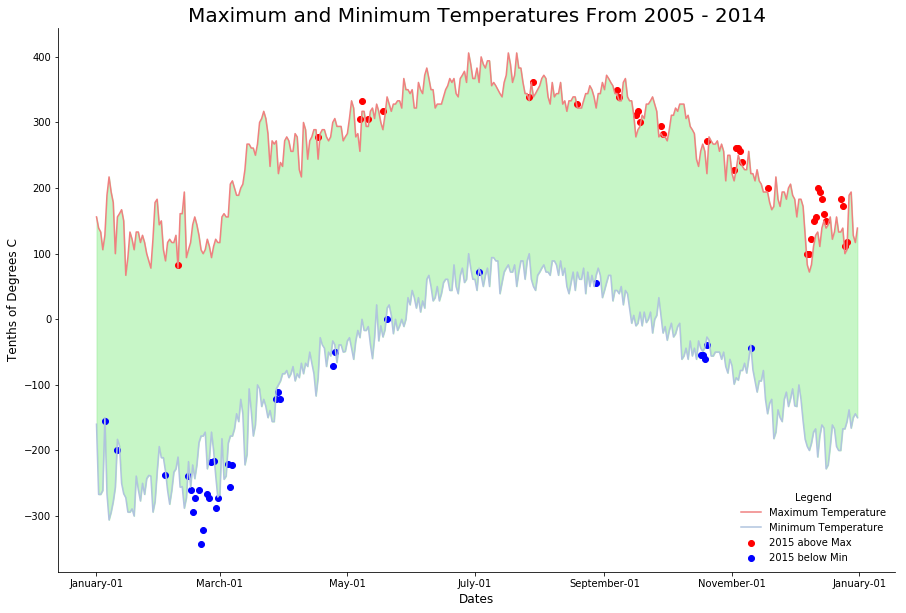

In [151]:
plt.figure()

plt.rcParams["figure.figsize"] = (15,10)

plt.plot(dates_max, 
         df_tmax_2005_14['Data_Value'],
         color = 'lightcoral',
         label = 'Maximum Temperature')

plt.plot(dates_max,
         df_tmin_2005_14['Data_Value'],
         color = 'lightsteelblue',
         label = 'Minimum Temperature')

plt.gca().fill_between(dates_max,
                       df_tmin_2005_14['Data_Value'],
                       df_tmax_2005_14['Data_Value'],
                       color = 'lightgreen',
                       alpha = 0.5)

plt.scatter(dates_overlay_max,
            df_merged_max['Data_Value_y'],
            color = 'red',
            label = '2015 above Max')

plt.scatter(dates_overlay_min,
            df_merged_min['Data_Value_y'],
            color = 'blue',
            label = '2015 below Min')

plt.title('Maximum and Minimum Temperatures From 2005 - 2014', size = 20)
plt.xlabel('Dates', size= 12)
plt.ylabel('Tenths of Degrees C', size= 12)

for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)

plt.legend(loc=4, frameon=False, title='Legend')

date_form = mdates.DateFormatter("%B-%d")
plt.gca().xaxis.set_major_formatter(date_form)

plt.show()